In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append("src")
from lda import LDA # custom library

In [2]:
df = pd.read_csv("data/healthcare.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [4]:
df = pd.get_dummies(df, columns=['gender'])
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,True,False
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True,False,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True,False,False
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True,False,False


In [5]:
df = df.rename(columns={"gender_Female":"Female", "gender_Other":"Other", "gender_Male":"Male"})
df.head()


,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,True,False
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True,False,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True,False,False
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True,False,False


In [6]:
df["Female"] = df["Female"].astype(int)
df["Male"] = df["Male"].astype(int)
df["Other"] = df["Other"].astype(int)
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0


In [7]:
df['ever_married'] = df['ever_married'].str.strip().str.lower()
df['ever_married'] = df['ever_married'].map({"yes": 1, "no": 0})
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,1,0,0
2,31112,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0


In [8]:
df['Residence_type'] = df['Residence_type'].str.strip().str.lower()
df['Residence_type'] = df['Residence_type'].map({"urban": 1, "rural": 0})
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,1,0,0
2,31112,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,1,0,0


In [9]:
df = df.drop(columns=["work_type"])

In [10]:
mean_bmi = df["bmi"].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,1,0
1,51676,61.0,0,0,1,0,202.21,28.893237,never smoked,1,1,0,0
2,31112,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.400000,smokes,1,1,0,0
4,1665,79.0,1,0,1,0,174.12,24.000000,never smoked,1,1,0,0


In [11]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
df = pd.get_dummies(df, columns=['smoking_status'])
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,False,False,True,False


In [13]:
df["smoking_status_Unknown"] = df["smoking_status_Unknown"].astype(int)
df["smoking_status_formerly smoked"] = df["smoking_status_formerly smoked"].astype(int)
df["smoking_status_never smoked"] = df["smoking_status_never smoked"].astype(int)
df["smoking_status_smokes"] = df["smoking_status_smokes"].astype(int)
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0


In [14]:
# now the actual LDA part comes
df = df.drop(columns=["id"])

In [15]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'Female',
       'Male', 'Other', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [16]:
y = df["stroke"].values
X = X = df.drop(columns=['stroke']).values
X, y

(array([[67.,  0.,  1., ...,  1.,  0.,  0.],
        [61.,  0.,  0., ...,  0.,  1.,  0.],
        [80.,  0.,  1., ...,  0.,  1.,  0.],
        ...,
        [35.,  0.,  0., ...,  0.,  1.,  0.],
        [51.,  0.,  0., ...,  1.,  0.,  0.],
        [44.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [17]:
# okay now the real deal comeds
lda = LDA(X,y)

In [18]:
lda.fit()
y_pred = lda.predict(X)
print("Training accuracy:", np.mean(y_pred == y))


Training accuracy: 0.9455968688845401


In [19]:
# train-test split part
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train


(array([[79.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [62.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [21.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [ 1.16,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [80.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [46.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [21]:
model = LDA(X_train, y_train)
model.fit()

In [22]:
y_pred = lda.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"The test came out with an accuracy of {accuracy * 100}%")

The test came out with an accuracy of 93.54207436399217%


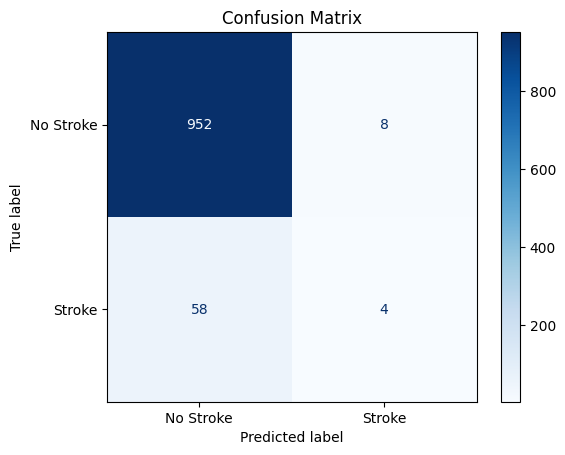

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [25]:
# got high number for False Negative ( a lot of people who had stroke were identified as having no storke lol)
# testing with Sklearn's LDA to see if its a problem with my model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_sklearn = LinearDiscriminantAnalysis()
lda_sklearn.fit(X_train, y_train)
y_predict = lda_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"The test came out with an accuracy of {accuracy_sklearn * 100}%")


The test came out with an accuracy of 93.54207436399217%


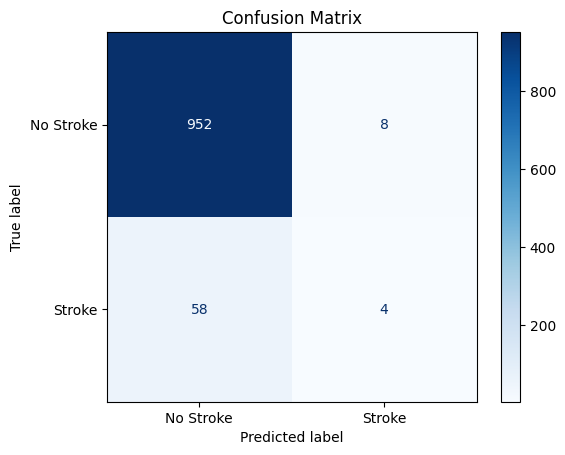

In [26]:
cm_sk = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sk, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [27]:
# its the exact same lol, so changing the train test set a little bit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, y_train


(array([[77.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  1.,  0.],
        [17.,  0.,  0., ...,  0.,  1.,  0.],
        ...,
        [79.,  1.,  1., ...,  1.,  0.,  0.],
        [43.,  0.,  0., ...,  0.,  0.,  0.],
        [62.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0, 0, 0, ..., 0, 1, 0]))

In [28]:
model = LDA(X_train, y_train)
model.fit()

In [29]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The test came out with an accuracy of {accuracy * 100}%")

The test came out with an accuracy of 95.2054794520548%


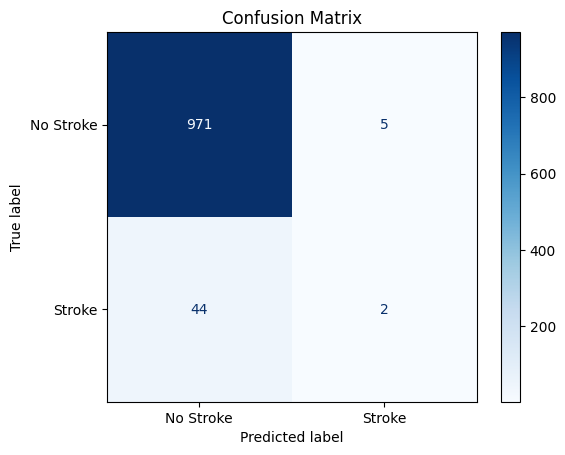

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [31]:
# much better than before but still. lol 
# let's test with a raw data
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'Female',
       'Male', 'Other', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [34]:
new_state = [20,0,0,0,1,170,22.9,0,1,0,0,0,1,0]
result = lda.predict(new_state)
print("Stroke" if result[0] == 1 else "No Stroke")

No Stroke


In [ ]:
# that's it for today i should prob investigate the reasons for such a high false negatives